In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini okuma
df = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')

# İlk birkaç satırı görüntüleyin
print(df.head())


   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Switzerland                 101.1        46.5   
1     2      Bahamas                  85.0        36.7   
2     3      Iceland                  83.0        39.2   
3     4    Singapore                  76.7        67.2   
4     5     Barbados                  76.6        19.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            74.9            109.1                    97.0   
1                            61.8             81.6                    83.3   
2                            62.0             88.4                    86.8   
3                            72.1             74.6                    50.4   
4                            48.9             80.8                    69.4   

   Local Purchasing Power Index  
0                         158.7  
1                          54.6  
2                         120.3  
3                         111.1  
4           

In [2]:
# Özet istatistikler
print(df.describe())

             Rank  Cost of Living Index  Rent Index  \
count  121.000000            121.000000  121.000000   
mean    61.000000             43.555372   16.052893   
std     35.073732             16.147574   11.412267   
min      1.000000             18.800000    2.400000   
25%     31.000000             30.200000    8.500000   
50%     61.000000             39.500000   12.400000   
75%     91.000000             52.800000   20.100000   
max    121.000000            101.100000   67.200000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      121.000000       121.000000   
mean                        30.357851        44.228926   
std                         13.263721        17.055109   
min                         11.100000        17.500000   
25%                         19.800000        31.600000   
50%                         27.000000        40.500000   
75%                         37.000000        53.700000   
max                         74.900000   

In [3]:
# En yüksek ve en düşük değerler
for column in df.columns[2:]:
    max_value = df[column].max()
    min_value = df[column].min()
    max_country = df[df[column] == max_value]['Country'].values[0]
    min_country = df[df[column] == min_value]['Country'].values[0]
    print(f"{column} - Max: {max_value} ({max_country}), Min: {min_value} ({min_country})")


Cost of Living Index - Max: 101.1 (Switzerland), Min: 18.8 (Pakistan)
Rent Index - Max: 67.2 (Singapore), Min: 2.4 (Bangladesh)
Cost of Living Plus Rent Index - Max: 74.9 (Switzerland), Min: 11.1 (Pakistan)
Groceries Index - Max: 109.1 (Switzerland), Min: 17.5 (Pakistan)
Restaurant Price Index - Max: 97.0 (Switzerland), Min: 12.8 (Bangladesh)
Local Purchasing Power Index - Max: 182.5 (Luxembourg), Min: 2.3 (Cuba)


In [4]:
# Sayısal sütunları seçin (Ülke isimlerini ve sıralama sütununu çıkarıyoruz)
numeric_df = df.drop(columns=['Rank', 'Country'])
# Korelasyon matrisi
corr_matrix = numeric_df.corr()
print(corr_matrix)


                                Cost of Living Index  Rent Index  \
Cost of Living Index                        1.000000    0.820885   
Rent Index                                  0.820885    1.000000   
Cost of Living Plus Rent Index              0.971780    0.932425   
Groceries Index                             0.958452    0.770944   
Restaurant Price Index                      0.945483    0.763537   
Local Purchasing Power Index                0.692688    0.683912   

                                Cost of Living Plus Rent Index  \
Cost of Living Index                                  0.971780   
Rent Index                                            0.932425   
Cost of Living Plus Rent Index                        1.000000   
Groceries Index                                       0.924935   
Restaurant Price Index                                0.913618   
Local Purchasing Power Index                          0.720701   

                                Groceries Index  Restaurant 

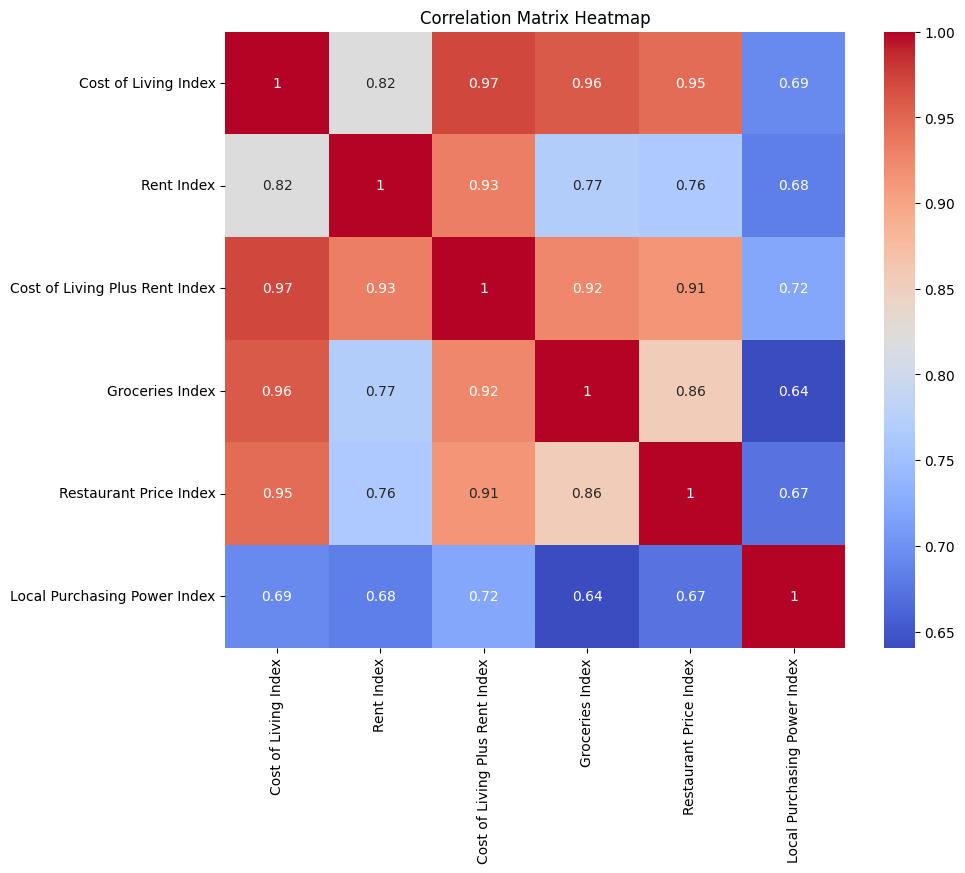

In [5]:
# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

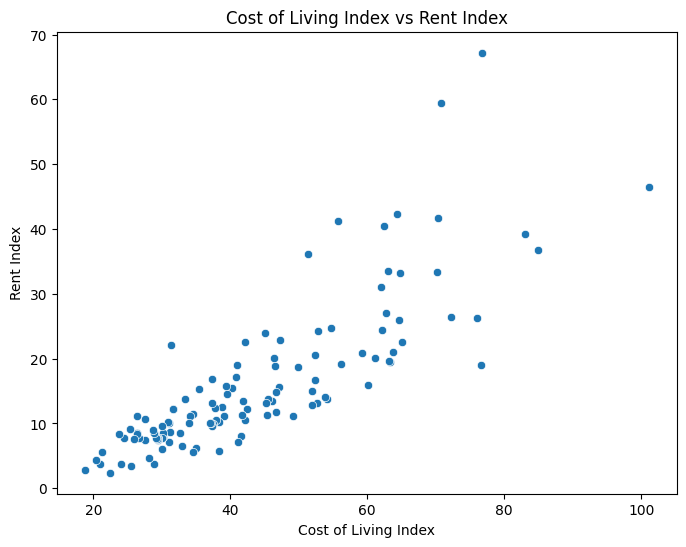

In [6]:
# Scatter plot örneği
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cost of Living Index', y='Rent Index', data=df)
plt.title('Cost of Living Index vs Rent Index')
plt.show()

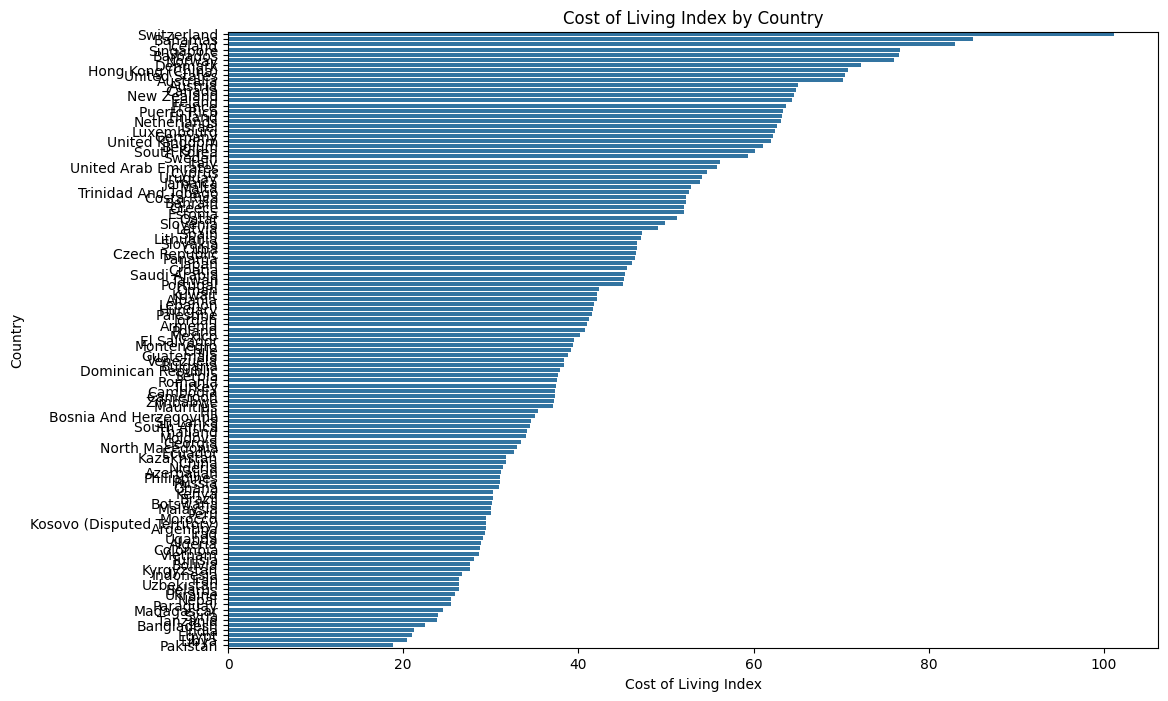

In [7]:
# Bar grafiği örneği
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values('Cost of Living Index', ascending=False)
sns.barplot(x='Cost of Living Index', y='Country', data=df_sorted)
plt.title('Cost of Living Index by Country')
plt.show()

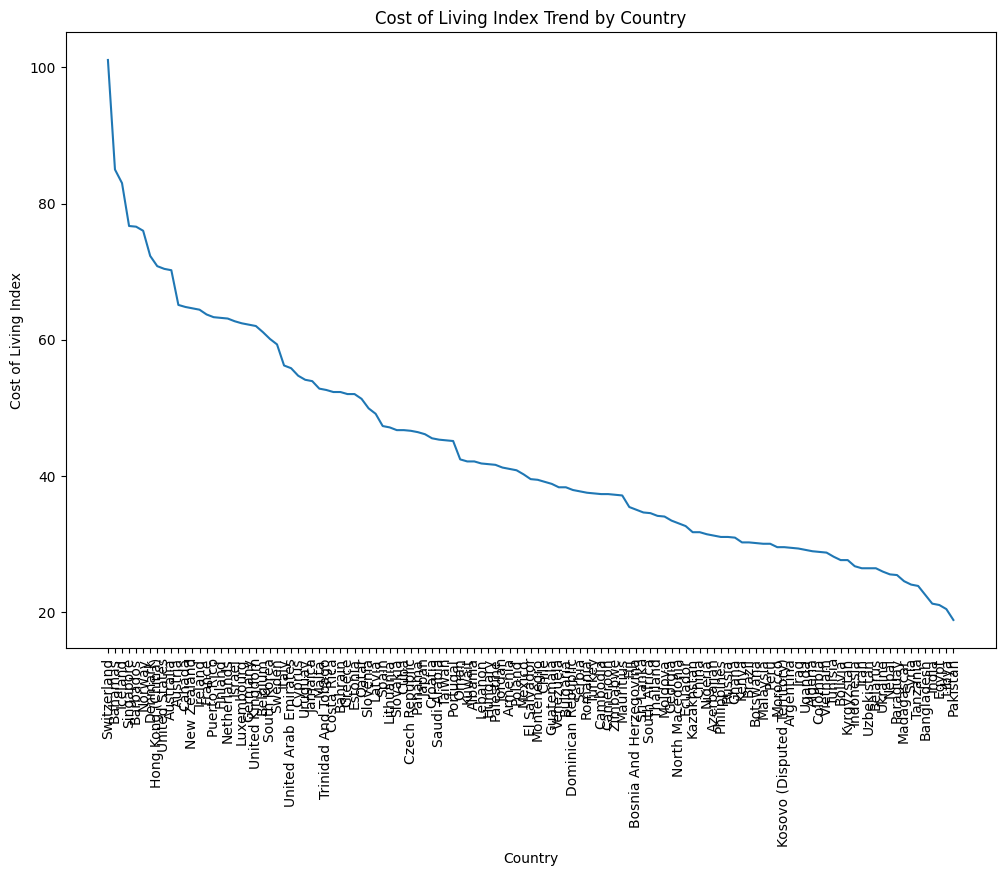

In [8]:
# Trend analizi örneği
df_sorted = df.sort_values('Cost of Living Index', ascending=False)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Country', y='Cost of Living Index', data=df_sorted)
plt.title('Cost of Living Index Trend by Country')
plt.xticks(rotation=90)
plt.show()

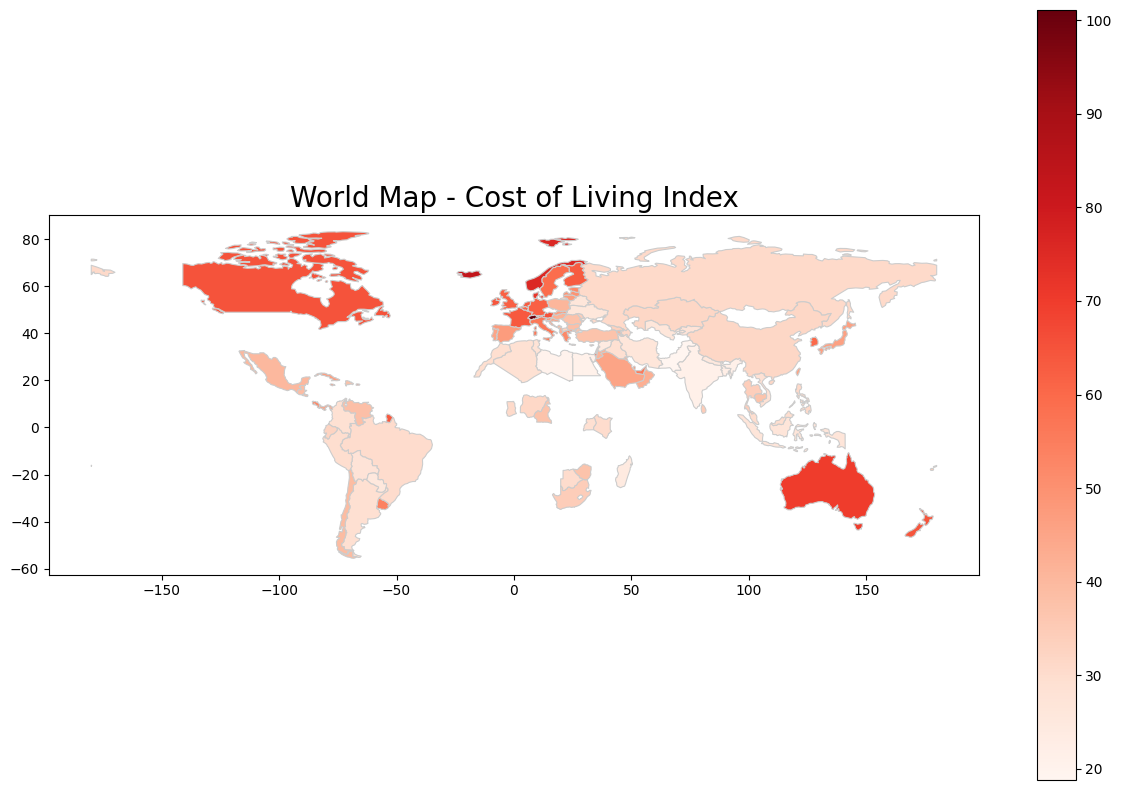

In [9]:
#dünya haritası oluşturma 
import geopandas as gpd

# Natural Earth verilerini doğrudan internetten indir
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Yaşam maliyeti verilerini oku (CSV dosyasını uygun şekilde güncelleyin)
cost_of_living_data = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')

# Harita ve veri setini, ülkeleri birleştirerek bir araya getir
world = world.rename(columns={'ADMIN': 'Country'})
merged = world.set_index('Country').join(cost_of_living_data.set_index('Country'))

# Haritayı renklendir (Yaşam Maliyeti İndeksine göre)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Cost of Living Index', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Başlık ekle
ax.set_title('World Map - Cost of Living Index', fontdict={'fontsize': 20}, loc='center')

# Göster
plt.show()